# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


In [88]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [89]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [90]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: int64

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [91]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
score = metrics.silhouette_score(X, kmeans.labels_)
score

0.5398971441034137

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [92]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
score = metrics.silhouette_score(X, kmeans.labels_)
score

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [93]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
score = metrics.silhouette_score(X, kmeans.labels_)
score

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

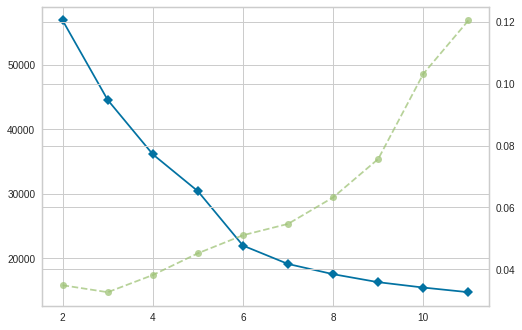

In [131]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
#from yellowbrick.cluster.elbow import kelbow_visualizer
#model = KElbowVisualizer(KMeans())
visualizer = KElbowVisualizer( model, k=(2,12), metric='distortion', timings=True, locate_elbow=True)


visualizer.fit(X)        # Fit the data to the visualizer
plt.show() 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c8a8e7390>,
                 k=None, metric=None, model=None, timings=True)

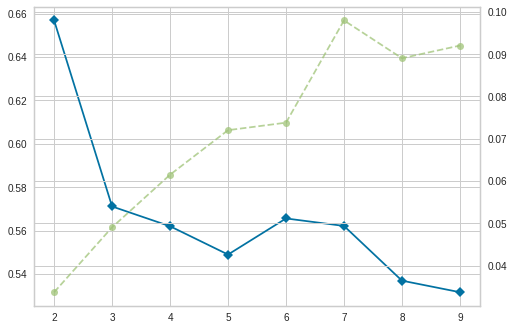

In [119]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10), metric='silhouette', locate_elbow=True
)

visualizer.fit(X)  
#plt.show()   

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10), metric='calinski_harabaz'
)

visualizer.fit(X)    
#visualizer.show() 

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit(X)


model = KMeans()
visualizer = KElbowVisualizer(
    clustering, k=(2,10), metric='distortion'
)

visualizer.fit(X) 

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit(X)


model = KMeans()
visualizer = KElbowVisualizer(
    clustering, k=(2,10), metric='silhouette'
)

visualizer.fit(X) 
#visualizer.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit(X)


model = KMeans()
visualizer = KElbowVisualizer(
    clustering, k=(2,10), metric='calinski_harabaz'
)

visualizer.fit(X) 

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

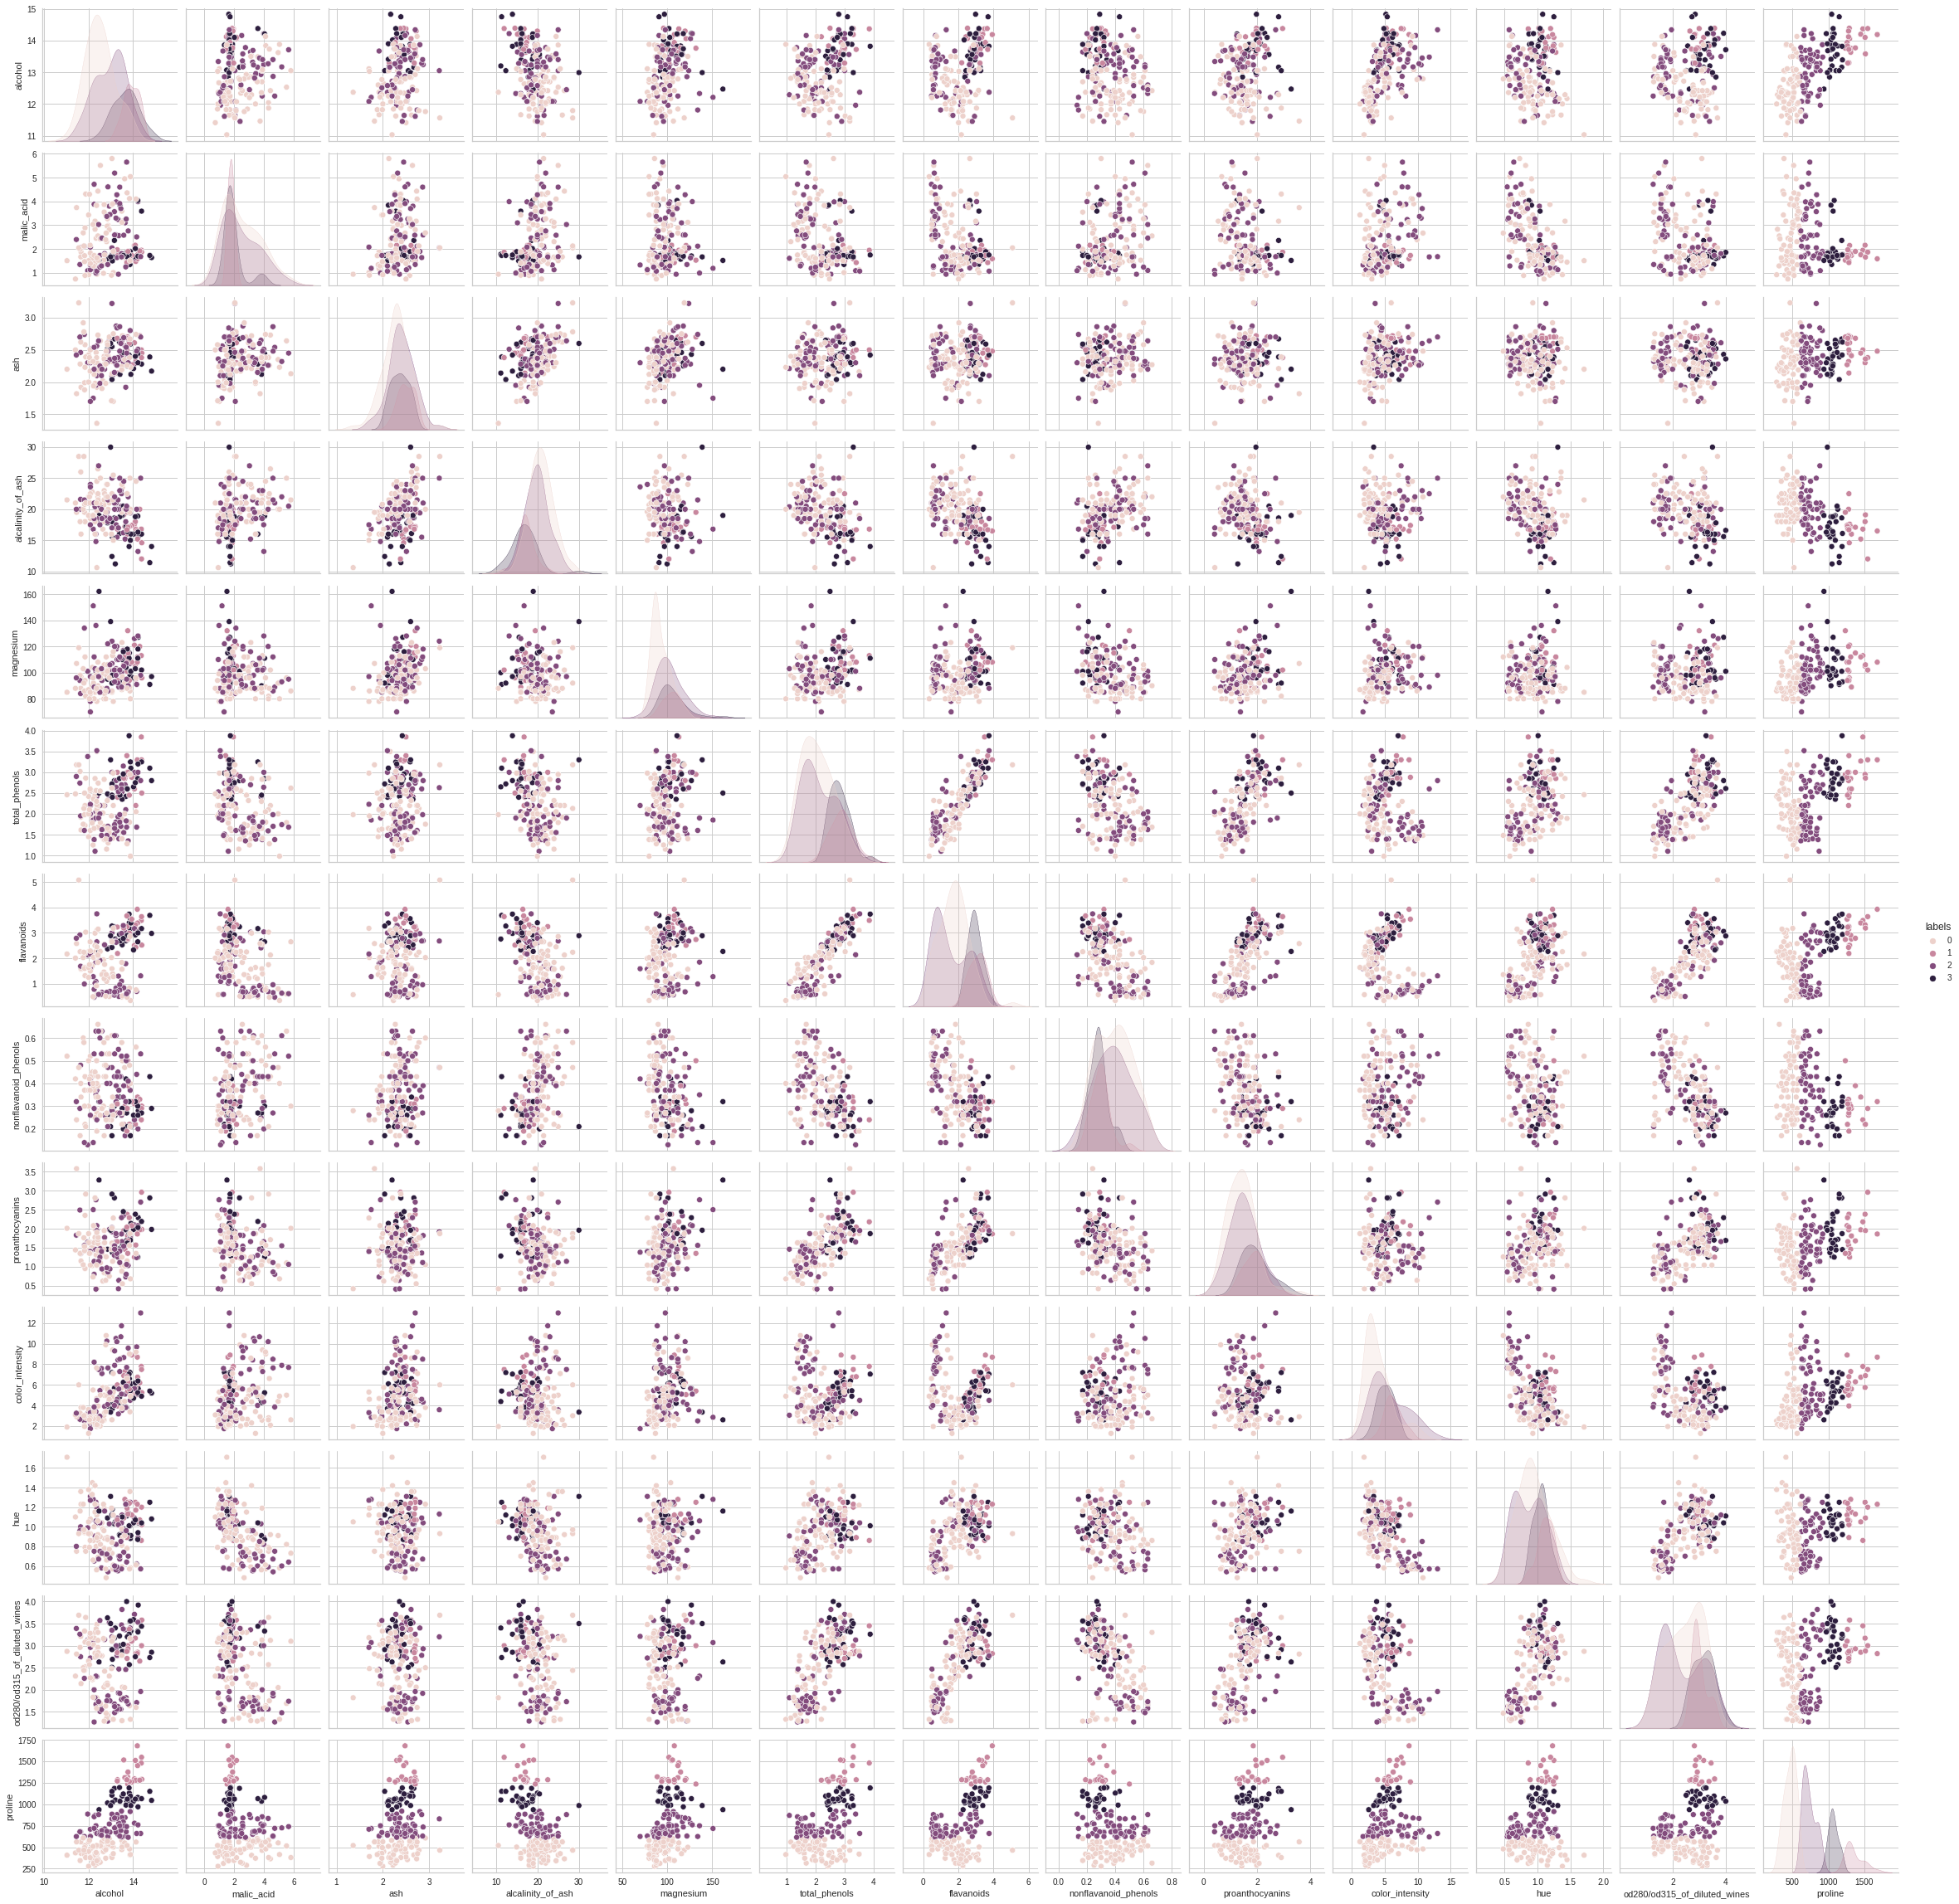

In [115]:
import seaborn as sns
modelo = AgglomerativeClustering(n_clusters = 4).fit(X)
X['labels'] = modelo.labels_
sns.pairplot(X, hue = 'labels')


## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [125]:
from sklearn.decomposition import PCA

In [128]:
pca = PCA()
pca.n_components = 2 
pca_data = pca.fit_transform(X)
df_pca = pd.DataFrame(data=pca_data, 
                      columns=['pc_1', 'pc_2'])

In [132]:
df_pca.head()

,pc_1,pc_2
0,318.566016,21.504510
1,303.100490,-5.349545
2,438.063897,-6.525976
3,733.237972,0.169207
4,-11.569773,18.498676


In [134]:
a_clustering = AgglomerativeClustering(n_clusters=4)
a_clustering = a_clustering.fit(X)

In [136]:
df_pca['labeles_km'] = model.labels_

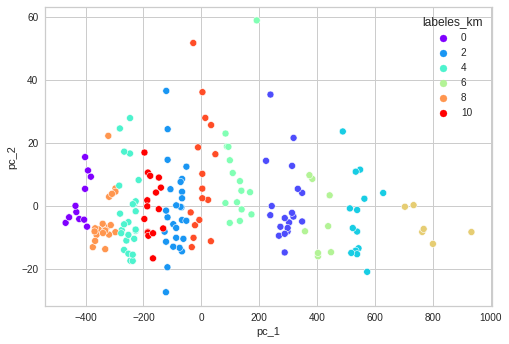

In [140]:
#plt.scatter(df_pca['pc_1'],df_pca['pc_2'], c = df_pca['labeles_km'],cmap='rainbow')

sns.scatterplot(x=df_pca['pc_1'],y=df_pca['pc_2'],hue=df_pca['labeles_km'],palette='rainbow')

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

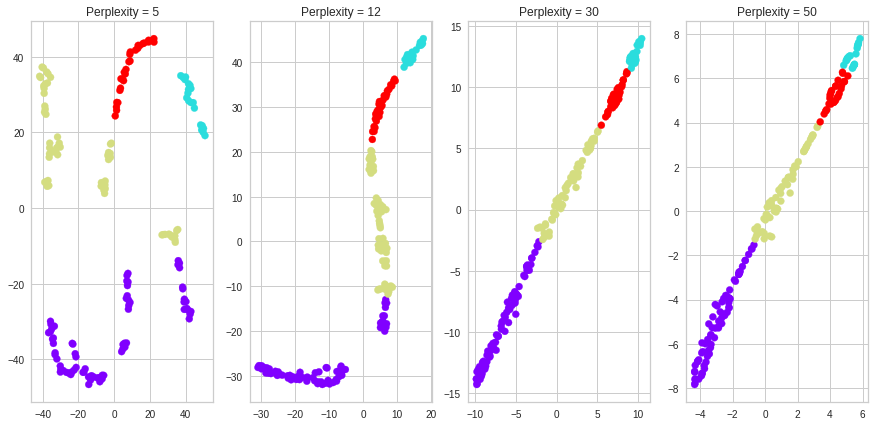

In [147]:

# https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
from sklearn.manifold import TSNE


# Creamos subplots
# https://towardsdatascience.com/how-to-tune-hyperparameters-of-tsne-7c0596a18868
fig, ax = plt.subplots(1, 4, figsize=(15, 7))
# Generamos Perplejidades
# OBTENER LA MÁS CERTERA n^(1/2)
for i, perp in enumerate([5,12, 30, 50]):
  # Usamos TSNE
    tsne = TSNE(perplexity=perp,random_state=123)
    # Vamos uniendo cada perpeplijdad segun el componente
    x_embedded = tsne.fit_transform(X)
    # De todos modos, todo esto es una forma larga de decir que los ejes de una 
    # gráfica t-SNE no son fácilmente interpretables en términos de los ejes / 
    # unidades de los datos originales de alta dimensión. Por tanto, no trataría 
    # de interpretar cuantitativamente una gráfica t-SNE; t-SNE es solo una técnica de visualización, nada más.
    # https://stats.stackexchange.com/questions/254090/what-are-the-axes-of-a-t-sne-scatterplot
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=X['labels'], cmap='rainbow')
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()
